# 프로젝트2 : Scikit-learn의 Toy Dataset 활용

(1) Scikit-learn 이란?

  python을 대표하는 머신러닝 라이브러리로 오픈 소스로 공개되어 있어 누구나 무료로 사용이 가능하다.

  이 사이킷런은 아래와 같이 2가지의 데이터셋을 제공한다.

- 간단하고 작은 데이터셋인 Toy datasets
- 비교적 복잡하고 현실 세계를 반영한 Real world datasets

(2) Toy Dataset

 사이킷런은 2가지 데이터셋을 제공한다고 위에서 말했는데 그 중에서도 Toy Dataset을 활용하여 프로젝트를 진행하고자 한다.
 
- Optical recognition of handwritten digits dataset : 손글씨 이미지 데이터
- Wine recognition dataset: 와인 데이터
- Breast cancer wisconsin (diagnostic) dataset : 유방암 데이터


## 목차

1. Digits Datasets

- 데이터 준비
- 데이터셋 분리
- 모델 학습 및 측정
- 결론


---


2. Wine Datasets

- 데이터 준비
- 데이터셋 분리
- 모델 학습 및 측정
- 결론


---


3. Cancer Breast Datasets

- 데이터 준비
- 데이터셋 분리
- 모델 학습 및 측정
- 결론


---
4. 회고

## <1> 손글씨를 분류해봅시다.

### **1. 데이터 준비**

In [ ]:
pip install matplotlib

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt    #이미지를 보기 위해 추가
%matplotlib inline

import pandas as pd

print("슝")

슝


In [ ]:
digits = load_digits()

print(dir(digits))    # dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함
digits.keys()    # keys()는 어떤 정보가 들어있는지 확인하는 메서드

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits_data = digits.data    #중요한 데이터를 변수 digits_data에 저장

print(digits_data.shape)   #배열의 형상 정보 확인

(1797, 64)


In [ ]:
digits_data[0]    #샘플로 데이터 1개 확인

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

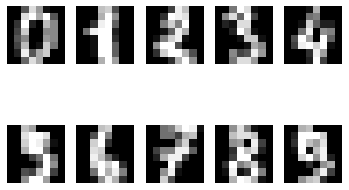

In [ ]:
# 이미지 확인하기

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

순서대로 sepal length, sepal width, petal length, petal width를 나타낸다.

In [ ]:
# 라벨지 확인

digits_label = digits.target    #데이터의 target을 digits_label 변수에 저장
print(digits_label.shape)
digits_label
digits.target_names    #라벨의 이름들 확인

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 데이터에 대한 설명 보기

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

- 총 5620 개의 데이터 -> DESCR 설명 중 오류 -> 총 1797개의 데이터
- feature 은 64개의 픽셀값 (8x8 이미지)
- 10개의 라벨
- 결측치 없음

### **2. 데이터셋 분리**

데이터셋 분리는 sklearn.model_selection 패키지의 train_test_split 함수로 간단하게 분리 할 수 있다.

이를 활용해 training dataset과 test dataset을 분리해보겠다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

#만들어진 데이터셋 확인
X_train.shape, y_train.shape
X_test.shape, y_test.shape

X_train 개수:  1437 , X_test 개수:  360


((360, 64), (360,))

### **3. 모델 학습 및 측정**

### (1) Decision Tree 사용

In [ ]:
#모델 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=32)    #decision_tree 라는 변수에 모델을 저장
decision_tree.fit(X_train, y_train)

#test 데이터로 예측+정확도 확인
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



0.8555555555555555

### **❗ 분석**
 accuracy 결과를 보면 대략 84%의 정확도로 생각보다 높지 않은 수치가 나왔다.

  성능 지표를 살펴보면 숫자손글씨 3, 8,9에서 f1-score 이 0.8 이하로 낮게 나온 것을 볼 수 있다. 
  
  이 숫자손글씨들의 판단률이 낮아지면서 전체적인 정확도에 영향을 주었다고 생각한다.

###  (2) Random Forest 사용

In [ ]:
#모델 학습
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



0.975

### **❗ 분석**

 성능지표를 살펴보면 전반적으로 수치가 높다.
 
 대부분 90후반대에 분포하는데 눈에 띄는 것은 숫자손글씨 2가 100%의 올바르게 판단하였다는 것이다.

 Decision Tree에 비하면 상당히 성능이 좋음을 알 수 있다.

### (3) Support Vector Machine (SVM) 사용

In [ ]:
#모델 학습
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



0.9861111111111112

### **❗ 분석**

성능지표를 대충 훑어보기만 해도 100% 올바르게 판단한 숫자들이 몇 개 보인다.

40%에 해당하는 숫자들이 f1-score에서 1.00 수치를 얻었고, SVM 모델이 숫자손글씨를 판단하는데 가장 적합한 모델이라고 생각한다.

### (4) Stochastic Gradient Descent Classifier (SGDClassifier)

In [ ]:
#모델 학습
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.92      0.92      0.92        36
           2       0.97      0.97      0.97        30
           3       0.91      0.98      0.94        41
           4       0.97      0.97      0.97        32
           5       0.97      0.85      0.91        46
           6       1.00      1.00      1.00        32
           7       0.95      1.00      0.98        40
           8       0.87      0.93      0.90        42
           9       0.93      0.90      0.91        29

    accuracy                           0.94       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.94      0.94       360



0.9444444444444444

### **❗ 분석**

성능 지표를 살펴보면 90% 초반대부터 후반대까지 골고루 분포해있다.

상대적으로 숫자손글씨 1, 5, 8, 9의 f1-score가 다른 숫자손글씨들에 비해 낮은 모습을 보여주는데

이들이 정확도에 영향을 주었다고 생각한다.

### (5) Logistic Regression 사용

In [ ]:
#모델 학습
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        41
           4       0.94      0.97      0.95        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.95      0.98        42
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9777777777777777

### **❗ 분석**

전반적으로 성능지표 수치들이 높다.

100% 올바르게 판단된 숫자손글씨가 전체의 30%이지만 다른 숫자손글씨들도 매우 우수한 수치를 가졌기 때문에,

아주 근소한 차이로 Random Forest 모델보다 높은 정확도를 가진 것을 확인할 수 있다.

따라서 Random Forest와 Logistic Regression 모델이 숫자손글씨 판별하는데 가장 적합한 모델이라고 생각한다.

### **4. 결론**



---

### [accuracy]


(1) Decision Tree    0.8444444444444444

(2) Random Forest   0.975

(3) SVM    0.9861111111111112

(4) SGDClassifier    0.9444444444444444

(5) Logistic Regression    0.9777777777777777


---
- 숫자 손글씨 판별은 0~9까지의 균등한 자료들을 좀 더 정확하게 맞춰야하기 때문에 '정확도'를 평가 지표로 사용하였다.

- Decision Tree 는 유일하게 90%를 넘지 못한 수치를 보여주었는데, 5개의 모델을 비교해본 결과 해당 모델은 숫자손글씨를 판별하는데 적합하지 않은 모델이라고 판단된다.
- 특히나 Random Forest, SVM, Logistic Regression 는 97%를 넘는 고정확도를 보여주는데 성능지표를 살펴봐도 상당히 우수한 수치들을 얻었음을 확인할 수 있다.
- 모델 적합성을 판단할 때는 정확도 뿐만 아니라 성능지표도 같이 확인하는 것이 좋다.
- F1 score는 Recall과 Precision의 조화평균을 의미한다.


# 가장 적합한 모델 : Random Forest, Logistic Regression




---



## <2> 와인을 분류해봅시다.

### **1. 데이터 준비**

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
wine = load_wine()    #load_wine() 메소드를 이용하여 변수 wine에 데이터를 할당
wine_data = wine.data      # wine feature데이터 저장 저장
wine_label = wine.target    # wine 의 라벨 저장

#데이터 확인
wine.keys()
print(wine_data.shape)
wine_data[0]

print("데이터 확인 끝!")

#라벨지 확인
print(wine_label.shape)
print(wine_label[:])
print(wine.target_names)

print("라벨지 확인 끝!")

#와인 데이터 설명 보기
print(wine.DESCR)

(178, 13)
데이터 확인 끝!
(178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']
라벨지 확인 끝!
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            -

- 총 178 개의 데이터
- feature 은 총 13개
- 3개의 라벨 - 0 (59개), 1 (71개), 2 (48개))
- 결측치 없음

### **2. 데이터셋 분리**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

#만들어진 데이터셋 확인
X_train.shape, y_train.shape
X_test.shape, y_test.shape

X_train 개수:  142 , X_test 개수:  36


((36, 13), (36,))

### **3. 모델 학습 및 측정**

### (1) Decision Tree 사용

In [ ]:
#모델 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=32)    #decision_tree 라는 변수에 모델을 저장
decision_tree.fit(X_train, y_train)

#test 데이터로 예측+정확도 확인
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



0.9444444444444444

### **❗ 분석**


f1-score 와 정확도 모두 0.9를 넘긴 준수한 수치를 보여준다.



###  (2) Random Forest 사용

In [ ]:
#모델 학습
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1.0

### **❗ 분석**

Random Forest 학습 결과 100%로 완벽한 수치를 보여준다.

성능 지표로도 우수한 결과가 나왔기 때문에 해당 모델은 와인 분류하기에 가장 적합하다고 생각한다.

### (3) Support Vector Machine (SVM) 사용

In [ ]:
#모델 학습
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6111111111111112

### **❗ 분석**

해당 모델의 f1-score 수치가 0.5 정도이다.

상당히 낮은 수치이기 때문에 부적합한 모델이다.

### (4) Stochastic Gradient Descent Classifier (SGDClassifier)

In [ ]:
#모델 학습
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        15
           1       0.45      0.50      0.48        10
           2       0.00      0.00      0.00        11

    accuracy                           0.56        36
   macro avg       0.35      0.50      0.41        36
weighted avg       0.38      0.56      0.44        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5555555555555556

### **❗ 분석**

해당 모델의 f1-score 는 0.5도 되지 않는 아주 낮은 수치이다.

따라서 매우 부적합한 모델이다.

### (5) Logistic Regression 사용

In [ ]:
#모델 학습
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.0

### **❗ 분석**


학습 결과 100%로 완벽한 수치를 보여준다.

성능 지표로도 우수한 결과가 나왔기 때문에 해당 모델은 와인 분류하기에 가장 적합하다고 생각한다.

### **4. 결론**



---

### [f1-score]


(1) Decision Tree    0.94

(2) Random Forest   1.00

(3) SVM    0.52

(4) SGDClassifier    0.44

(5) Logistic Regression    1.00


---
f1-score를 살펴보면 SVM, SGDClassifier 모델은 매우 낮은 수치가 나왔다.

따라서 이 모델들은 가장 부적합한 모델이 될 것 이다.

Random Forest, Logistic Regression 모델들은 f1-score 수치도 1.0이지만 정확도도 1.0으로 반환하였다. 

따라서 이 모델들이 가장 정확한 모델들이라고 판단하였다.


#가장 적합한 모델 : Random Forest, Logistic Regression






---



## <3> 유방암 여부를 진단해봅시다.

### **1. 데이터 준비**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
breast_cancer = load_breast_cancer()    #load_breast_cancer() 메소드를 이용하여 변수 breast_cancer에 데이터를 할당
breast_cancer_data = breast_cancer.data      # breast_cancer feature데이터 저장 저장
breast_cancer_label = breast_cancer.target    # breast_cancer 의 라벨 저장

#데이터 확인
breast_cancer.keys()
print(breast_cancer_data.shape)
breast_cancer_data[0]

print("데이터 확인 끝!")

#라벨지 확인
print(breast_cancer_label.shape)
print(breast_cancer_label[:])
print(breast_cancer.target_names)

print("라벨지 확인 끝!")

#유방암 데이터 설명 보기
print(breast_cancer.DESCR)

(569, 30)
데이터 확인 끝!
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 

- 총 569 개의 데이터
- feature 은 총 30개
- 2개의 라벨 - Malignant(악성 종양) 212개 , Benign(양성 종양) 357개
- 결측치 없음


### **2. 데이터셋 분리**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_label, test_size=0.2, random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

#만들어진 데이터셋 확인
X_train.shape, y_train.shape
X_test.shape, y_test.shape

X_train 개수:  455 , X_test 개수:  114


((114, 30), (114,))

### **3. 모델 학습 및 측정**

### (1) Decision Tree 사용

In [ ]:
#모델 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=32)    #decision_tree 라는 변수에 모델을 저장
decision_tree.fit(X_train, y_train)

#test 데이터로 예측+정확도 확인
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



0.9122807017543859

### **❗ 분석**

recall 이 0.96으로 정확도보다 근소하게 높다.

###  (2) Random Forest 사용

In [ ]:
#모델 학습
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



1.0

### **❗ 분석**

성능 지표 모두 1 그리고 정확도도 100%의 수치를 반환받았다.

따라서 어떠한 지표로 봐도 해당 모델은 유방암 판별에 상당히 적합한 모델이라고 생각할 수 있다.

### (3) Support Vector Machine (SVM) 사용

In [ ]:
#모델 학습
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



0.9035087719298246

### **❗ 분석**

recall 을 보면 1로 매우 높은 수치를 받았다.

하지만 정확도를 보면 90% 정도로 recall에 비하면 좋지 않은 수치이다.

따라서 이 모델 수치를 상회하는 모델이 있다면 해당 모델은 유방암 판단에 적합하지 않은 모델이 될 것이다.

### (4) Stochastic Gradient Descent Classifier (SGDClassifier)

In [ ]:
#모델 학습
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.94      0.72      0.82        40
           1       0.87      0.97      0.92        74

    accuracy                           0.89       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.89      0.88       114



0.8859649122807017

### **❗ 분석**

해당 모델은 recall 수치는 0.97로 상당히 우수한 편에 있다.

하지만 정확도로 보면 0.9도 못 미치는 수치로 유방암 판별에 좋은 모델은 아니라고 생각한다.

### (5) Logistic Regression 사용

In [ ]:
#모델 학습
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

#test 데이터로 예측+정확도 확인
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9385964912280702

### **❗ 분석**

 Logistic Regression 모델 또한 recall 수치는 1.0으로 상당히 좋다.

 하지만 그에 비해 정확도는 0.93 으로 다소 아쉽다.

### **4. 결론**



---

### [Recall]


(1) Decision Tree    0.96

(2) Random Forest   1.00

(3) SVM    1.00

(4) SGDClassifier    0.97

(5) Logistic Regression    1.00


---

유방암 여부 판단하기 위한 모델을 선정하기 위해

평가 지표들 중 'Recall'을 가장 중점적으로 보았다.

왜냐하면 유방암 양성을 음성으로 판별하면 안되기 때문에(큰일남) 이를 위해서 recall 지표를 살펴보는 것이 가장 정확하다고 생각한다.

단순히 recall 수치만 비교하면 사실상 전부 다 좋은 수치를 얻었기 때문에 유방함 판별에 적합해 보인다. 특히나 Random Forest, SVM, Logistic Regression 는 recall이 1.0 이기 때문에 무조건적으로 적합한 모델같아 보인다.

하지만 모델 선정할 때는 한 가지의 지표만 보는 등의 오류를 범하지 않아야한다.
그래서 두 번 째로는 정확도를 살펴보았고, 정확도 또한 100%를 반환한 Random Forest가 유방암 판별에 가장 정확한 모델이라고 생각한다.

#가장 적합한 모델 : Random Forest






---



## <4> 회고

처음에 프로젝트 전 이론으로만 봤을 때 각 모델들의 산출 방식과 성능 지표들을 잘 이해하지 못했다.

직접 프로젝트를 진행해보니 조금씩 모델들이 이해됐고, 특히나 성능 지표들을 알아가는 눈이 생긴 것 같아 스스로 이 점에 대해서 뿌듯해한다.

개인적으로 각 모델들에 대한 그래프들도 뽑아보고 싶었으나 너무 길어질 것 같아 여기엔 넣지 않았다.

그래프를 뽑아 관련 함수들에 대해 이해해보는 시간도 굉장히 좋을 것 같다.

exploration1 할 때만 해도 막히는 부분들이 많아 흥미를 느끼지 못했는데, 2부터는 조금씩 내가 아는 부분들이 생기니 조금 더 흥미를 가지고 진행할 수 있게 되었다.

초반 코드를 짤 때 import 해야하는 코드들을 한 번에 정리하지 못해 계속 오류가 나곤 했는데 첫 번째 미니 프로젝트를 진행하면서 코드를 한 번 정리를 하게 되니 어떤 코드가 대충 어디 위치에서 쓰이게 된지 알게 되었다.

생각보다 막힘없이 진행할 수 있어서 기뻤다!